In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, FastICA

from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error 

In [10]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

In [81]:
# labels = [1]*100 + [2]*100 + [3]*100
# label_df = pd.DataFrame(labels, columns=['class'], index=df.index)
# label_df['class'] = label_df['class'].astype('category')
# label_df.to_csv('sig-label.csv')


# HW 1: Separate 3 Mixed Signals
- https://github.com/akcarsten/Independent_Component_Analysis ***for more understanding***
- ICA: https://towardsdatascience.com/introduction-to-ica-independent-component-analysis-b2c3c4720cd9

In [5]:
dt = pd.read_csv('./Homework1_2.csv', header=None)
dt

0          1          2          3          4          5   \
0  26.457721   6.373042  24.406436 -21.420511 -46.703654   5.891017   
1  25.779513  16.231147  27.094654 -18.071918 -34.640614  13.241859   
2 -10.221810   1.482440  -8.163424  10.198639  23.175781   1.011951   

          6          7          8          9          10        11         12  \
0 -18.012103  56.829872 -21.871273  42.978627 -29.108275 -6.698777  32.272178   
1 -13.906859  61.356120 -19.921072  46.689437 -18.512865  3.745557  41.224511   
2   8.776835 -20.302510   8.843920 -15.738883  14.801548  6.234125  -9.103315   

          13        14        15         16         17         18         19  \
0 -18.662368 -2.061580 -2.299116   5.125023 -49.228321  55.760879  11.234361   
1  -7.164441  4.708875  5.857856  16.509455 -34.177493  63.534693  14.114177   
2  11.485449  3.426512  4.564833   3.016610  25.026624 -18.381178  -3.050334   

          20         21         22         23         24         25  \
0 -14.990338 -45.536815 -35.619598 -18.388911  27.280419  37.578996   
1  -7.641113 -35.477316 -23.056885 -20.171455  30.645110  34.744877   
2   8.325784  20.994984  17.924452   5.501897  -9.677506 -15.613799   

          26        27         28         29        30         31         32  \
0  15.458865 -2.007697 -35.156316 -23.760977  3.041349 -35.442231 -10.278091   
1  18.020072 -8.015254 -42.248829 -23.943860 -6.770960 -31.683030 -19.095058   
2  -4.747062 -1.183775  11.487246   9.633151 -4.651450  15.497974   0.444301   

          33         34        35         36         37         38         39  \
0  40.431621  16.406814  0.011699  29.720167 -40.324473 -37.652082 -11.544834   
1  31.560877  14.132623 -3.989430  25.580950 -47.008981 -41.926470 -22.912507   
2 -19.223810  -7.714209 -2.461812 -13.431951  12.445531  12.798419   0.200497   

         40         41         42         43         44         45         46  \
0  5.144532 -46.710109  34.194084 -42.444250  31.805484 -39.959518  20.032946   
1  4.459488 -43.472972  26.586578 -44.745418  19.574386 -43.483768   4.934159   
2 -1.629085  19.496966 -15.315728  15.808066 -17.035246  13.799230 -14.146379   

          47         48         49         50         51         52        53  \
0  41.021058  32.050171  26.592997 -10.433834  13.435092  52.523531 -3.874719   
1  38.547264  30.705422  20.930864 -23.065422  -0.191710  44.125284 -7.176445   
2 -17.418156 -13.235058 -12.832760  -1.250880 -10.731002 -23.037597  0.715574   

          54        55         56         57         58         59  
0 -12.330504  3.633880 -47.078784  36.485556  39.828980 -44.407339  
1 -22.848881  3.151831 -44.786313  36.383408  35.933678 -49.997388  
2   0.915156 -0.903180  19.424042 -14.003091 -16.826937  14.573394

### Standardisation conducted

In [6]:
scaled_dt = StandardScaler().fit_transform(dt.T)
scaled_dt.shape

(60, 3)

In [146]:
from scipy.stats import kurtosis
kurtosis_value = kurtosis(scaled_dt)


"""Interpretation of kurtosis values:

- A kurtosis value close to 0 suggests a distribution similar to a normal distribution.
- Positive kurtosis indicates heavy tails (more outliers) compared to a normal distribution.
- Negative kurtosis indicates lighter tails (fewer outliers) compared to a normal distribution
"""

'Interpretation of kurtosis values:\n\n- A kurtosis value close to 0 suggests a distribution similar to a normal distribution.\n- Positive kurtosis indicates heavy tails (more outliers) compared to a normal distribution.\n- Negative kurtosis indicates lighter tails (fewer outliers) compared to a normal distribution\n'

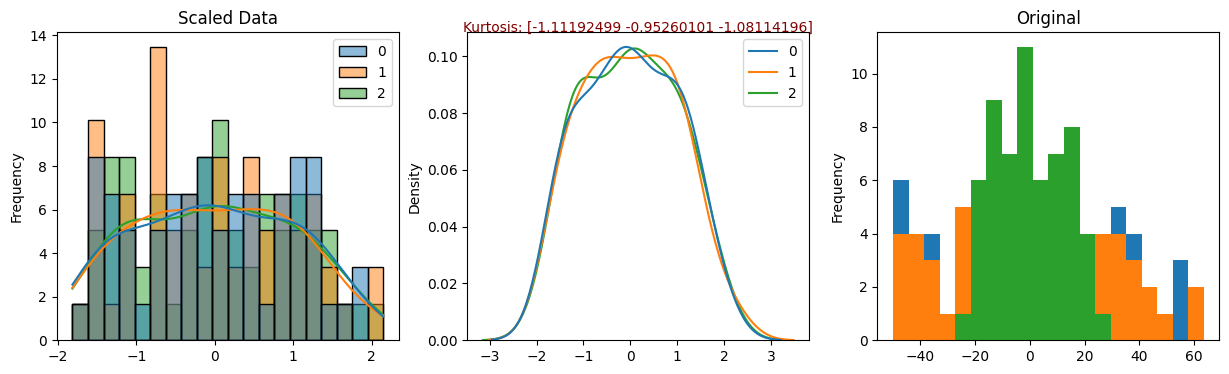

In [147]:
plt.figure(figsize=(15,4)).tight_layout()
ax = plt.subplot(1,3,1)
ax.set_title('Scaled Data')

sns.histplot(scaled_dt, stat='frequency', kde=True, bins=20, ax=ax)
sns.kdeplot(scaled_dt, ax=plt.subplot(1,3,2))
#check if data is normal
plt.annotate(f'Kurtosis: {kurtosis_value}', xy=(0.5, 1), xycoords='axes fraction', ha='center', fontsize=10, color='maroon')

dt.T.plot(kind='hist', bins=20, legend=False, title='Original', ax=plt.subplot(1,3,3))


plt.show()

In [5]:
pca_m =PCA(n_components=3,random_state=42)
pca_com = pca_m.fit_transform(dt.T)


In [6]:
ica_m = FastICA(n_components=3, random_state=42)
ica_com = ica_m.fit_transform(dt.T)

In [7]:
ica_com.shape , pca_com.shape

((60, 3), (60, 3))

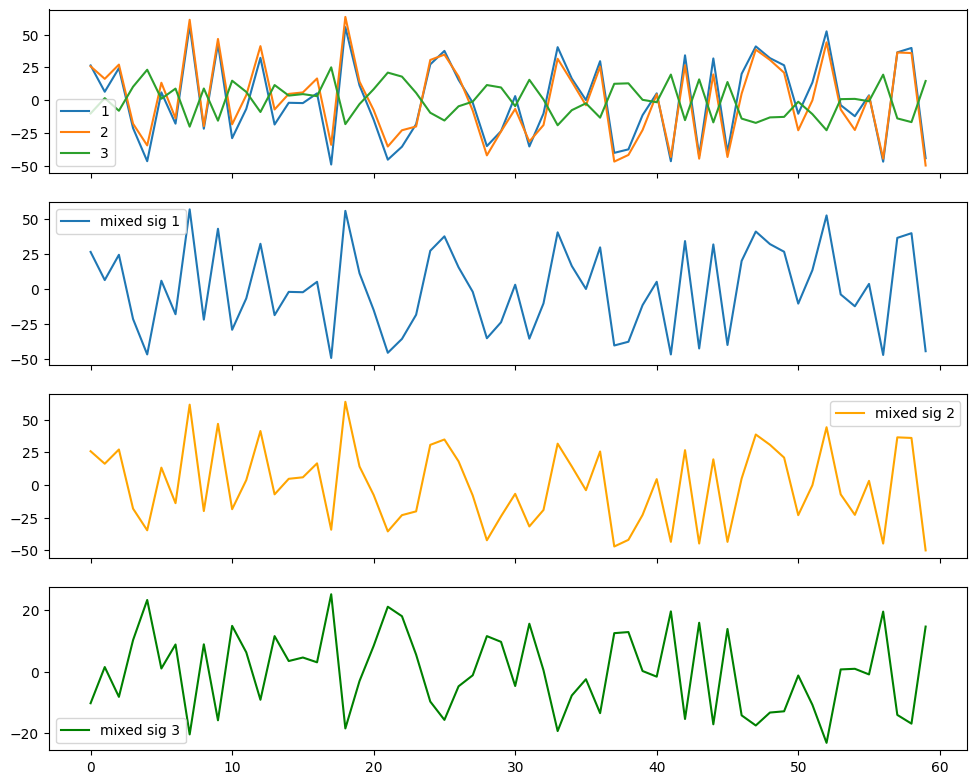

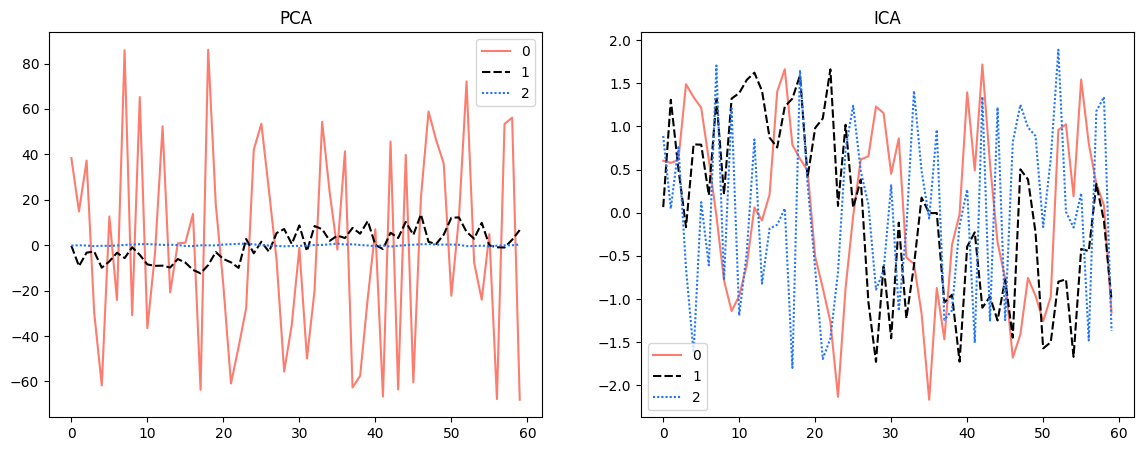

In [11]:
#ALL PLOTS COMBINED
fig, ax = plt.subplots(nrows=4,ncols=1, figsize=(10,8), sharex=True)
fig.tight_layout()
ax[0].plot(dt.T, label=(dt.index +1))
ax[0].legend()

ax[1].plot(dt.loc[0].T, label= 'mixed sig 1')
ax[2].plot(dt.loc[1].T, label= 'mixed sig 2', c='orange')
ax[3].plot(dt.loc[2].T, label= 'mixed sig 3', c='green')
ax[1].legend()
ax[2].legend()
ax[3].legend()

plt.show()

pal=sns.crayon_palette(sns.crayons)[8:11]
#ALL THREE TOGETHER 
plt.figure(figsize=(14,5)).tight_layout()
plt.subplot(1,2,1).set_title('PCA')
sns.lineplot(pca_com, ax=plt.subplot(1,2,1), palette=pal)

plt.subplot(1,2,2).set_title('ICA')
sns.lineplot(ica_com, ax=plt.subplot(1,2,2), palette=pal)
plt.show()

In [12]:
def plot_trans_sig(com, palette, col):
    for i in range(com.shape[1]):
       sns.lineplot(com[:, i], color=pal[i],ax=ax[i][col], label=f'Component {i+1}')

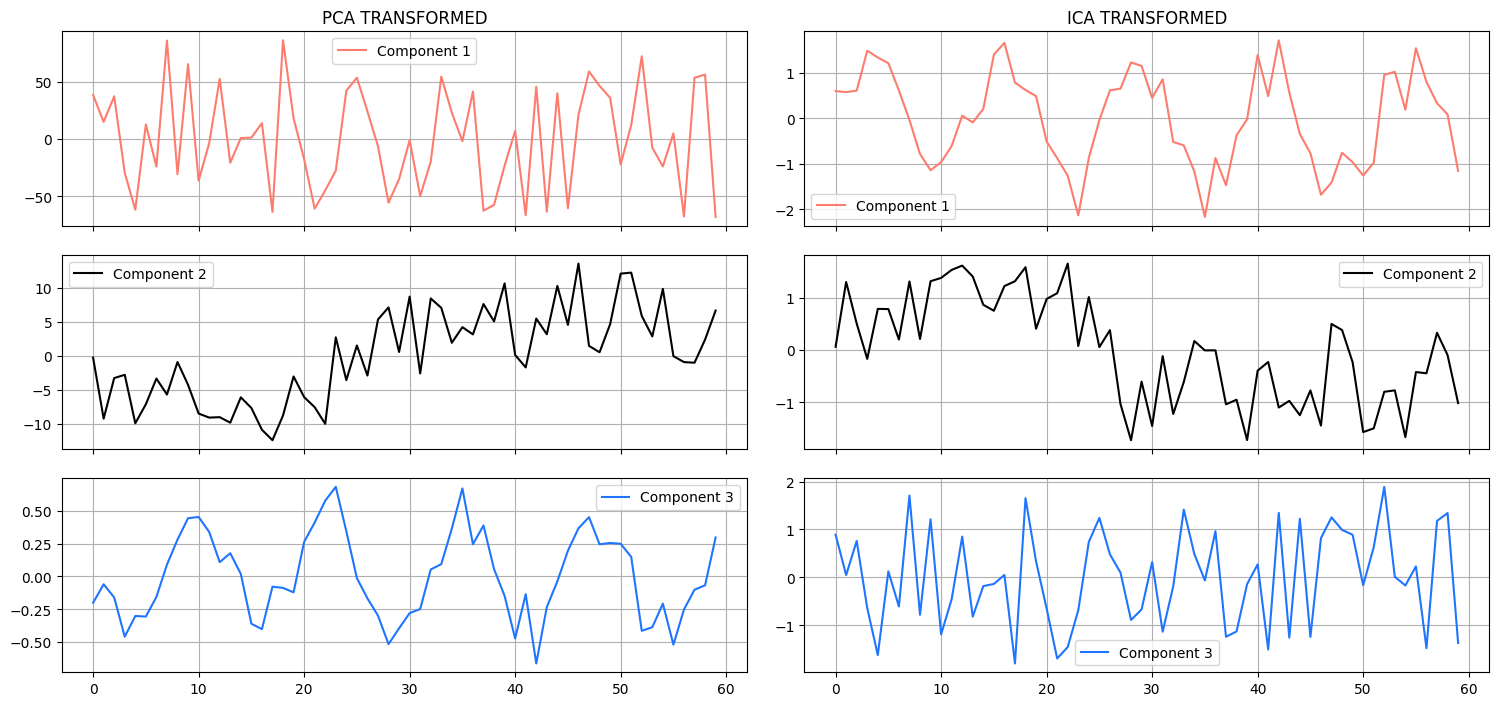

In [18]:
#RESULTS OF PCA AND ICA

#EACH SOURCE SIGNALS
fig, ax = plt.subplots(3,2,sharex=True, figsize=(15,7))
fig.tight_layout()
ax[0][0].set_title('PCA TRANSFORMED')
plot_trans_sig(pca_com, pal, 0)
# sns.lineplot(pca_com[:,0], ax=ax[1][0])
# sns.lineplot(pca_com[:,1], ax=ax[2][0])
# sns.lineplot(pca_com[:,2], ax=ax[3][0])
ax[0][1].set_title('ICA TRANSFORMED')
plot_trans_sig(ica_com, pal, 1)
# sns.lineplot(ica_com[:,0], ax=ax[1][1])
# sns.lineplot(ica_com[:,1], ax=ax[2][1])
# sns.lineplot(ica_com[:,2], ax=ax[3][1])
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i][j].grid()
        ax[i][j].legend()
plt.show()

In [267]:
sns.crayon_palette(sns.crayons)

[(0.9372549019607843, 0.8705882352941177, 0.803921568627451),
 (0.803921568627451, 0.5843137254901961, 0.4588235294117647),
 (0.9921568627450981, 0.8509803921568627, 0.7098039215686275),
 (0.47058823529411764, 0.8588235294117647, 0.8862745098039215),
 (0.5294117647058824, 0.6627450980392157, 0.4196078431372549),
 (1.0, 0.6431372549019608, 0.4549019607843137),
 (0.9803921568627451, 0.9058823529411765, 0.7098039215686275),
 (0.6235294117647059, 0.5058823529411764, 0.4392156862745098),
 (0.9921568627450981, 0.48627450980392156, 0.43137254901960786),
 (0.0, 0.0, 0.0),
 (0.12156862745098039, 0.4588235294117647, 0.996078431372549),
 (0.6352941176470588, 0.6352941176470588, 0.8156862745098039),
 (0.050980392156862744, 0.596078431372549, 0.7294117647058823),
 (0.45098039215686275, 0.4, 0.7411764705882353),
 (0.8705882352941177, 0.36470588235294116, 0.5137254901960784),
 (0.796078431372549, 0.2549019607843137, 0.32941176470588235),
 (0.7058823529411765, 0.403921568627451, 0.30196078431372547),
 (1.0, 0.4980392156862745, 0.28627450980392155),
 (0.9176470588235294, 0.49411764705882355, 0.36470588235294116),
 (0.6901960784313725, 0.7176470588235294, 0.7764705882352941),
 (1.0, 1.0, 0.6),
 (0.0, 0.8, 0.6),
 (1.0, 0.6666666666666666, 0.8),
 (0.8666666666666667, 0.26666666666666666, 0.5725490196078431),
 (0.11372549019607843, 0.6745098039215687, 0.8392156862745098),
 (0.7372549019607844, 0.36470588235294116, 0.34509803921568627),
 (0.8666666666666667, 0.5803921568627451, 0.4588235294117647),
 (0.6039215686274509, 0.807843137254902, 0.9215686274509803),
 (1.0, 0.7372549019607844, 0.8509803921568627),
 (0.9921568627450981, 0.8588235294117647, 0.42745098039215684),
 (0.16862745098039217, 0.4235294117647059, 0.7686274509803922),
 (0.9372549019607843, 0.803921568627451, 0.7215686274509804),
 (0.43137254901960786, 0.3176470588235294, 0.3764705882352941),
 (0.807843137254902, 1.0, 0.11372549019607843),
 (0.44313725490196076, 0.7372549019607844, 0.47058823529411764),
 (0.42745098039215684, 0.6823529411764706, 0.5058823529411764),
 (0.7647058823529411, 0.39215686274509803, 0.7725490196078432),
 (0.8, 0.4, 0.4),
 (0.9058823529411765, 0.7764705882352941, 0.592156862745098),
 (0.9882352941176471, 0.8509803921568627, 0.4588235294117647),
 (0.6588235294117647, 0.8941176470588236, 0.6274509803921569),
 (0.5843137254901961, 0.5686274509803921, 0.5490196078431373),
 (0.10980392156862745, 0.6745098039215687, 0.47058823529411764),
 (0.9411764705882353, 0.9098039215686274, 0.5686274509803921),
 (1.0, 0.11372549019607843, 0.807843137254902),
 (0.6980392156862745, 0.9254901960784314, 0.36470588235294116),
 (0.36470588235294116, 0.4627450980392157, 0.796078431372549),
 (0.792156862745098, 0.21568627450980393, 0.403921568627451),
 (0.23137254901960785, 0.6901960784313725, 0.5607843137254902),
 (0.996078431372549, 0.996078431372549, 0.13333333333333333),
 (0.9882352941176471, 0.7058823529411765, 0.8352941176470589),
 (1.0, 0.7411764705882353, 0.5333333333333333),
 (0.9647058823529412, 0.39215686274509803, 0.6862745098039216),
 (0.803921568627451, 0.2901960784313726, 0.2980392156862745),
 (0.592156862745098, 0.6039215686274509, 0.6666666666666666),
 (1.0, 0.5098039215686274, 0.2627450980392157),
 (0.7843137254901961, 0.2196078431372549, 0.35294117647058826),
 (0.9372549019607843, 0.596078431372549, 0.6666666666666666),
 (0.9921568627450981, 0.7372549019607844, 0.7058823529411765),
 (0.10196078431372549, 0.2823529411764706, 0.4627450980392157),
 (0.18823529411764706, 0.7294117647058823, 0.5607843137254902),
 (0.09803921568627451, 0.4549019607843137, 0.8235294117647058),
 (1.0, 0.6392156862745098, 0.2627450980392157),
 (0.7294117647058823, 0.7215686274509804, 0.4235294117647059),
 (1.0, 0.4588235294117647, 0.2196078431372549),
 (0.9019607843137255, 0.6588235294117647, 0.8431372549019608),
 (0.2549019607843137, 0.2901960784313726, 0.2980392156862745),
 (1.0, 0.43137254901960786, 0.2901960784313726),
 (0.10980392156862745, 0.6627450980392157, 0.788235294117647),
 (1.0, 0

# HW2 TASK 1: PCA -- Dimension reduction/ feature representation, and classification
-  1 - 100   Normal (class 1)
- 101-200  Cyclic (class 2)
- 201-300  Upward shift (class 3)

Now, we have 50 samples and 60 features on both training and test sets. => dimension = (50,60)

In [11]:
df = pd.read_csv('./Homework1_1.csv', header=None)
df.columns = df.columns.astype(str)
class_df = pd.read_csv('./synth-sig-w-class.csv').drop(columns='Unnamed: 0')


In [12]:
train = class_df[:50].drop(columns='class') #first 50 of normal signal data as TRAINING
test = class_df[50:].drop(columns='class')# another rest of normal data -- 50 data as TEST SET 
test_lb = class_df[50:]['class']
print(train.shape, test.shape, test_lb.shape)

(50, 60) (250, 60) (250,)


In [26]:
# # pca = PCA(n_components=10)
# # pca_train = pca.fit(train)
# # print(pca_train.components_)
# print(pca_train.n_samples_, pca_train.n_components_, pca_train.n_features_in_, pca_train.components_.shape, pca_train.mean_.shape)
# # pca_train.mean_
# print(pca.explained_variance_ratio_)
# sns.lineplot(pca.explained_variance_)

## ANOMALY DETECTION
***for reference and more understanding*** : https://github.com/jeffprosise/Machine-Learning/blob/master/Anomaly%20Detection%20(PCA).ipynb 
- either follow this the code above or,
- follow your professor guide -- they both work the same way, just that your prof.'s way is to compute it by hand.



### PCA BY HAND

<Axes: >

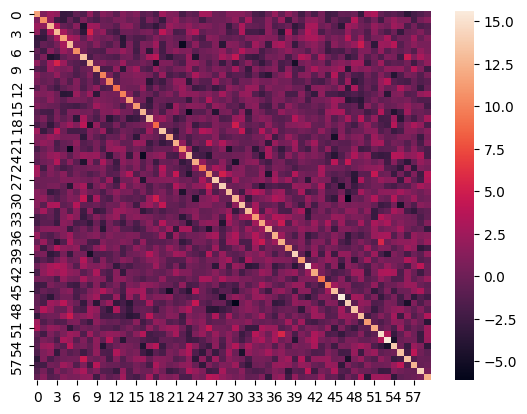

In [13]:
# sns.heatmap(np.cov(train.T))
sns.heatmap(train.cov())

$y_x = E_C * x$

In [14]:
print(train.cov().shape)

eigenvalues, eigenvectors = np.linalg.eig(train.cov())
#Get indices for sorting in descending order
idx = eigenvalues.argsort()[::-1]
#Sort the eigenvalues in descending order 
eigenvalues = eigenvalues[idx]
#Sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

print(eigenvalues.shape, eigenvectors.shape)

(60, 60)
(60,) (60, 60)


In [34]:
# K = 10 
def k_cpn_projection_on_data(K=eigenvalues.shape[0]): # FUNCTION FOR COMPUTING K COMPONENTS PROJECTION ONTO DATA
    y_train = eigenvectors.real[:K,:] @ train.T 
    y_train_mean = np.mean(y_train, axis=1)
    y_test = eigenvectors.real[:K,:] @ test.T 
    return y_train, y_train_mean, y_test

In [18]:
y_train_5, train_5_mean, y_test_5 = k_cpn_projection_on_data(5)
y_train_10,  train_10_mean, y_test_10 = k_cpn_projection_on_data(10)
y_train_30,  train_30_mean, y_test_30 = k_cpn_projection_on_data(30)
print(y_train_10.shape,  train_10_mean.shape, y_test_10.shape)

(10, 50) (10,) (10, 250)


In [33]:
def reconstruct_data():
    pass

In [36]:
def compute_euclidean_distance(y_test, mean):
    dist = np.sqrt( np.sum( np.square(y_test.T - mean), axis=1) )
    # dist = pd.Series(data=dist).re
    return dist

In [37]:
del_y_5 = compute_euclidean_distance(y_test_5, train_5_mean)
del_y_10 = compute_euclidean_distance(y_test_10, train_10_mean)
del_y_30 = compute_euclidean_distance(y_test_30, train_30_mean)

In [23]:
# np.quantile(del_y_5,0.25)
np.std(del_y_5)

10.06483659758195

In [24]:
def plotly_plot(del_y, K):
    fig = px.line(del_y, title=f'distance of y_x and mean_vec when K = {K}').add_hline( 
            y=np.mean(del_y), 
            line_color='black', 
            line_width=2, 
            line_dash ='dash',
            annotation_text = 'mean'
        ).add_hline( 
        y=np.quantile(del_y,0.25), 
        line_color='red', 
        line_width=2, 
        line_dash ='dash',
        annotation_text = '1st quantile'
        ).add_hline( 
        y=np.std(del_y), 
        line_color='orange', 
        line_width=2, 
        line_dash ='dash',
        annotation_text = 'std')
    fig.show()
    

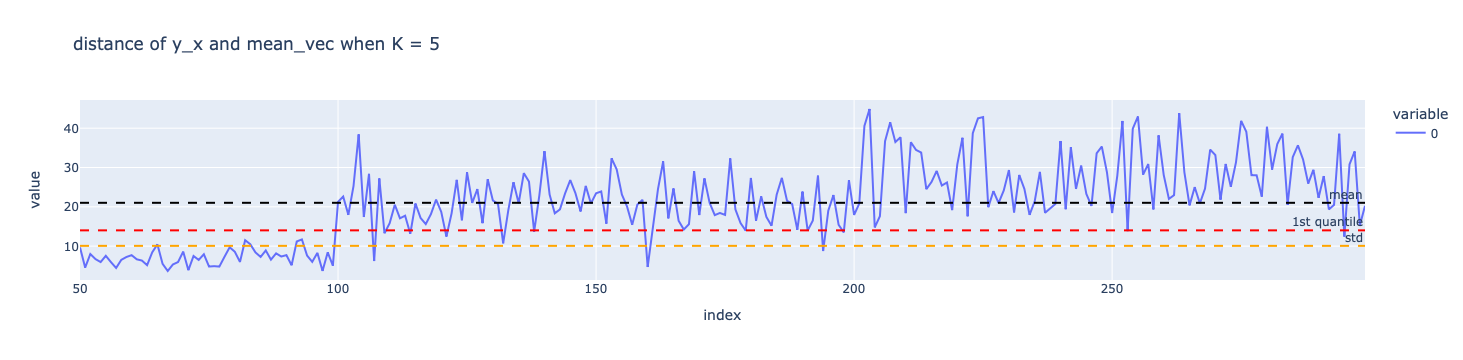

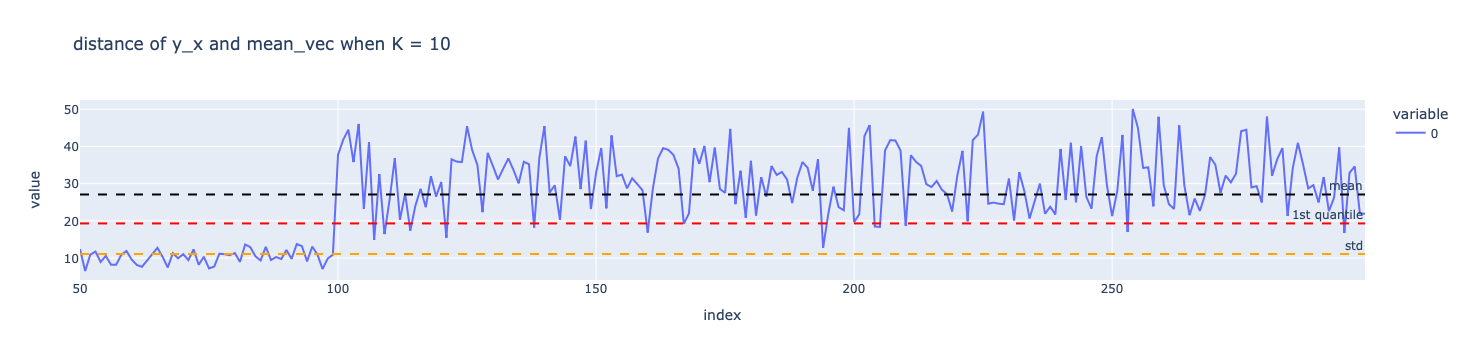

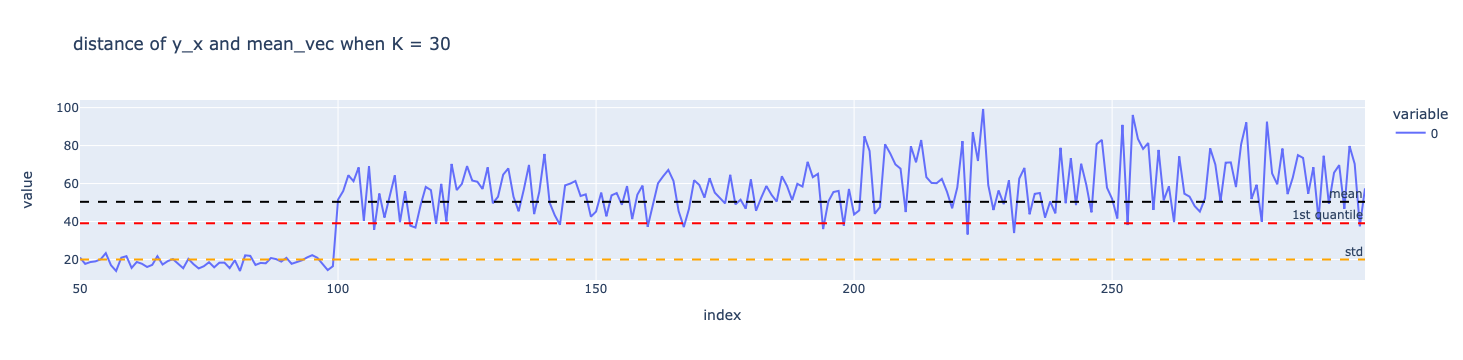

In [25]:
plotly_plot(del_y_5, 5)
plotly_plot(del_y_10,10)
plotly_plot(del_y_30,30)

### DEFINE THRESHOLD AND DETECT ANOMALIES

anomaly sample:Index([100, 101, 102, 103, 104, 105, 106, 108, 110, 111,
       ...
       289, 290, 291, 292, 293, 294, 296, 297, 298, 299],
      dtype='int64', length=187)


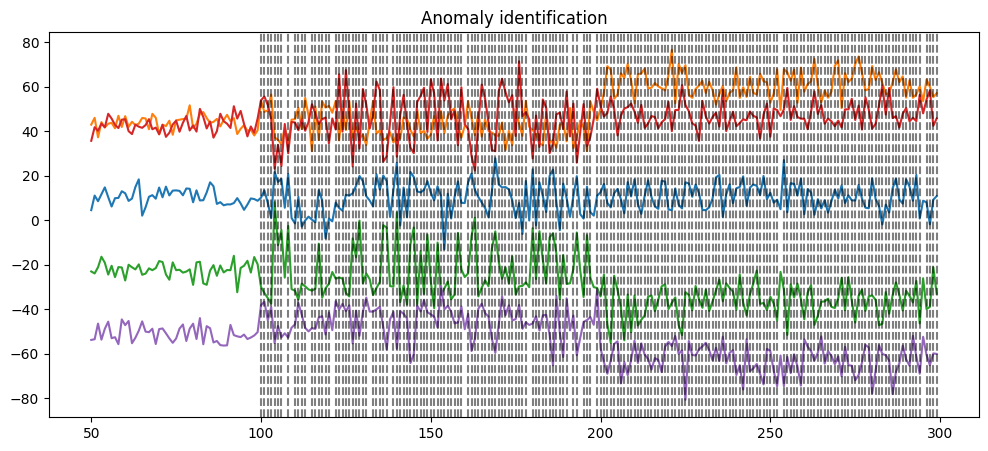

anomaly sample:Index([100, 101, 102, 103, 104, 105, 106, 108, 110, 111,
       ...
       289, 290, 291, 292, 293, 294, 296, 297, 298, 299],
      dtype='int64', length=187)


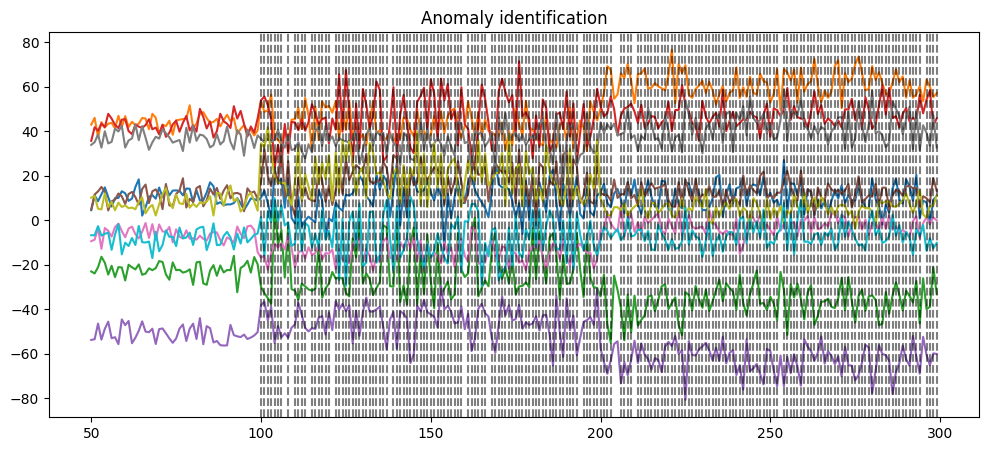

anomaly sample:Index([100, 101, 102, 103, 104, 105, 106, 108, 109, 110,
       ...
       289, 290, 291, 292, 293, 294, 295, 296, 297, 299],
      dtype='int64', length=187)


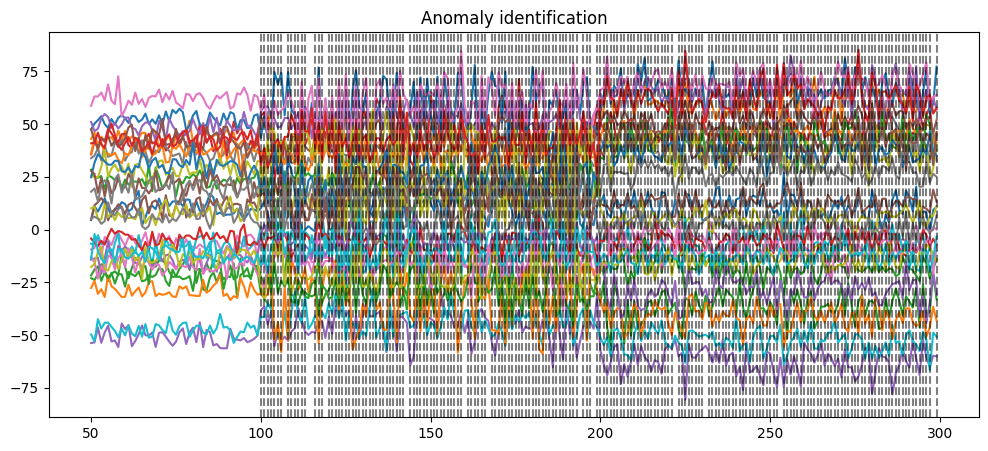

In [27]:
def get_anomaly_samples(distance, threshold):
    return pd.Series(distance > threshold)
    
def plot_anomalies(y, dist, thres):
    anomaly_row = get_anomaly_samples(dist, thres)
    
    y.T.plot(figsize=(12,5), title='Anomaly identification')
    anomalies = y.T.loc[anomaly_row]
    print(f'anomaly sample:{anomalies.index}')
    
    for i in anomalies.index:
        plt.axvline(i, color='black', ls='--', alpha=0.5)
    plt.legend().remove()
    plt.show()
    
#get_anomaly_samples(del_y_10, np.quantile(del_y_10, 0.75)) 
plot_anomalies(y_test_5, del_y_5, np.quantile(del_y_5, 0.25))
plot_anomalies(y_test_10, del_y_10, np.quantile(del_y_10, 0.25))
plot_anomalies(y_test_30, del_y_30, np.quantile(del_y_30, 0.25))



In [62]:
new_labels = [False]*50 + [True]*200


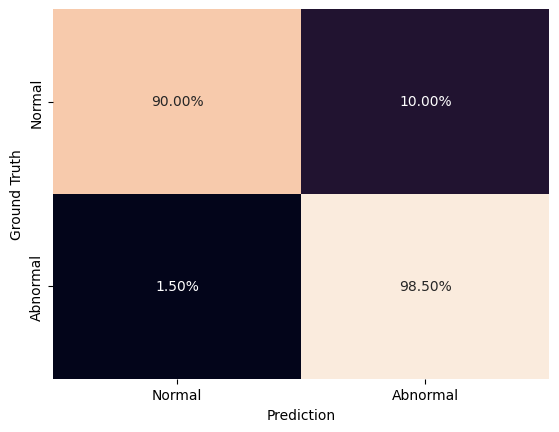

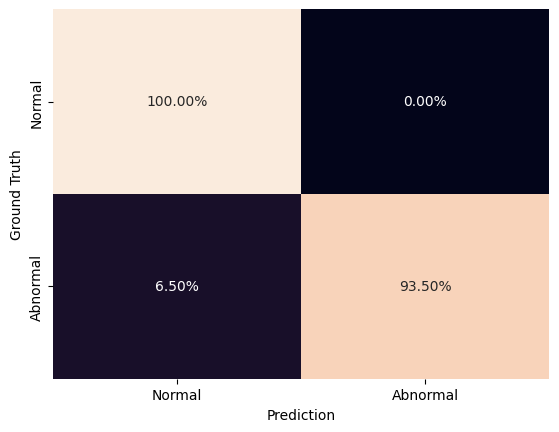

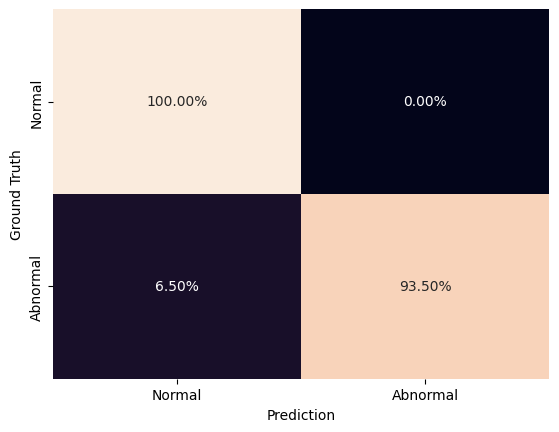

In [30]:
def plot_confusion_mat(del_y, thres, labels):
    predict = get_anomaly_samples(del_y, thres)
    con = confusion_matrix(new_labels, predict, normalize='true')
    sns.heatmap(con, fmt='.2%',annot=True, cbar=False, xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
    plt.xlabel('Prediction')
    plt.ylabel('Ground Truth')
    plt.show()
"""
By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.

Thus in binary classification, 
the count of true negatives is:math:`C_{0,0}`, 
false negatives is :math:`C_{1,0}`, 
true positives is:math:`C_{1,1}` and 
false positives is :math:`C_{0,1}`.
"""
# np.quantile(del_y_5, 0.25)
plot_confusion_mat(del_y_5, del_y_5.std(), new_labels) #use STD as a threshold
plot_confusion_mat(del_y_10, np.quantile(del_y_10, 0.25), new_labels)
plot_confusion_mat(del_y_30, np.quantile(del_y_30, 0.25), new_labels)



***HW instruction*** (compute by hand)
- let $y^-_normal$  be the mean vector of normal training samples. The anomaly is detected as follows:
Compute the distance for a test sample: 
- Compute the distance  delta $y_x = abs(y_x - y^-_normal)$ for a test sample x  


## A) Remove first component
*for more understanding:* https://machinelearningmastery.com/principal-component-analysis-for-visualization/
- X - 1st PC -- as thogh the first component as u know it captures the most variation of data, i.e. it contains the feature that hv the most info. about the data. Doing this to see and compare how the model will perform with and without it.
- X = training set

In [65]:
def remove_n_cpn_projection_on_data(N): # FUNCTION FOR COMPUTING K COMPONENTS PROJECTION ONTO DATA
    y_train = eigenvectors.real[N:,:] @ train.T 
    y_train_mean = np.mean(y_train, axis=1)
    y_test = eigenvectors.real[N:,:] @ test.T 
    return y_train, y_train_mean, y_test
y_removed, mean_removed_y, y_test_rm = remove_n_cpn_projection_on_data(1)

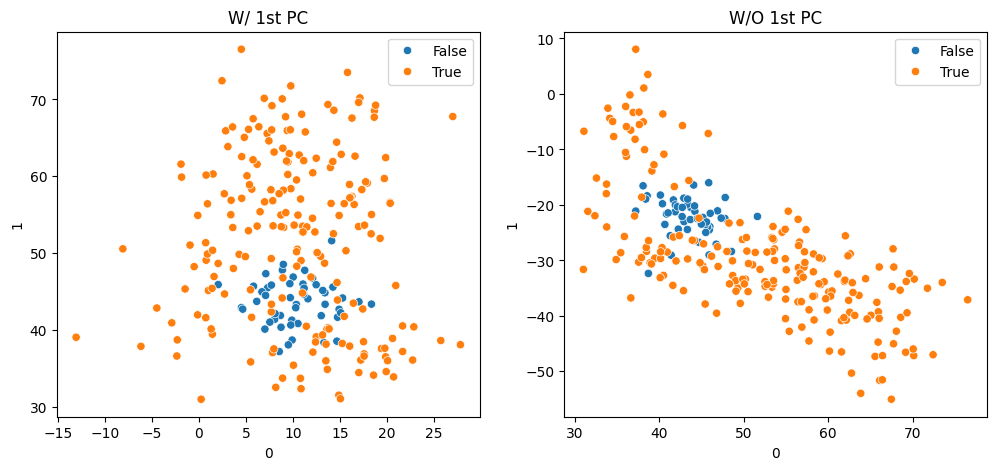

50         51         52         53         54        55        56   \
0  26.563844  26.266584  26.287082  24.739587  27.318898  28.34773  23.04689   

         57         58         59         60        61         62        63   \
0  22.049722  28.446946  28.004831  25.420646  25.62602  25.835453  26.28502   

         64         65         66        67         68         69         70   \
0  21.918858  26.250862  24.959564  26.53513  26.183062  28.482403  26.312867   

         71         72         73         74         75         76   \
0  26.976089  24.031556  25.241335  27.143351  27.282756  26.656389   

         77       78         79         80         81         82         83   \
0  27.350247  24.8663  25.650601  30.429238  26.042518  28.619338  31.105144   

         84         85         86         87        88         89         90   \
0  23.167527  23.249226  26.644847  27.481022  28.98355  26.192521  27.273515   

         91         92         93         94         95         96   \
0  27.551121  28.842126  27.901768  25.506883  28.242342  27.853216   

         97         98        99         100        101        102        103  \
0  24.719054  27.842078  25.34194  73.078067  74.487828  85.869143  90.433857   

         104       105       106        107        108        109        110  \
0  85.096164  57.85225  88.77126  57.545924  70.342401  70.114781  81.393708   

       111        112        113        114        115        116        117  \
0  82.8108  66.568034  82.896809  58.168775  65.316497  65.992897  72.364074   

         118        119        120        121        122        123       124  \
0  77.008455  57.613346  83.950237  67.694037  88.057965  75.994444  77.89531   

         125        126        127        128        129        130  \
0  91.622302  82.058754  79.413533  72.968414  79.435188  65.014974   

         131        132        133        134        135        136  \
0  70.535963  86.016139  93.499401  78.389306  66.925976  72.385712   

         137        138        139        140        141        142  \
0  84.178399  61.507514  75.892814  92.221334  82.025956  60.642226   

         143        144        145        146        147        148  \
0  64.839394  71.799987  68.882112  82.815526  72.870854  75.744555   

         149        150        151        152        153        154  \
0  58.602523  64.761466  71.481001  62.146406  71.941257  83.456273   

         155        156        157        158        159        160       161  \
0  68.529315  87.824848  57.332042  75.125381  77.572576  55.792585  66.30706   

         162       163        164        165        166        167        168  \
0  73.873578  83.61214  85.503353  81.812156  60.973117  62.542371  65.040442   

         169        170        171        172        173       174       175  \
0  71.633179  79.558777  75.686814  81.243595  69.947684  72.64174  67.39236   

         176        177        178        179        180        181  \
0  83.114115  75.293175  70.269336  77.577795  80.844746  71.810791   

         182        183        184        185        186        187  \
0  69.923765  78.467358  72.682379  64.126237  75.279757  76.604497   

         188        189        190        191        192        193       194  \
0  81.713298  77.273748  83.100017  98.570731  83.427603  79.809575  52.11215   

         195        196        197        198        199        200  \
0  81.243727  76.566886  84.313423  61.784907  74.362948  62.090609   

         201         202         203        204        205         206  \
0  65.594894  108.797065  100.173405  62.838715  65.689326  104.824012   

          207        208        209     210         211        212  \
0  100.112277  93.059084  87.361747  61.923  113.806497  97.172377   

          213        214        215        216        217        218  \
0  111.019584  87.630094  80.455975  77.207901  84.299885  77.731619   

         219        220         221  

In [76]:
pca_train, mean_pca_train, pca_test = k_cpn_projection_on_data()
del_y_removed = compute_euclidean_distance(y_test_rm, mean_removed_y)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1).set_title('W/ 1st PC')
sns.scatterplot(x=pca_test.T.iloc[:,0],y=pca_test.T.iloc[:, 1], data=pca_test.T, hue=new_labels, ax=plt.subplot(1,2,1))
plt.subplot(1,2,2).set_title('W/O 1st PC')
sns.scatterplot(x=y_test_rm.T.iloc[:,0],y=y_test_rm.T.iloc[:,1], data=y_test_rm.T, hue=new_labels, ax=plt.subplot(1,2,2))
plt.show()

pd.DataFrame(del_y_removed).T

## B) DATA NORMALISATION

In [293]:
standardised_data = StandardScaler().fit_transform(normal_sig_data)
scaled_train = standardised_data[:50]
scaled_train = pd.DataFrame(scaled_train)

In [295]:
"""
conduct the same thing as before just using standardscaler
"""

'\nconduct the same thing as before just using standardscaler\n'

## C) SMOOTHING
- https://learnpython.com/blog/python-moving-average/
- https://www.geeksforgeeks.org/how-to-calculate-moving-average-in-a-pandas-dataframe/
- https://www.linkedin.com/pulse/mastering-low-pass-high-pass-filters-image-processing-allan-cruz-2nlzf
- https://stackoverflow.com/questions/25191620/creating-lowpass-filter-in-scipy-understanding-methods-and-units

In [ ]:
from scipy import signal

In [82]:
'''
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, fs=fs, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()
'''


'\nimport numpy as np\nfrom scipy.signal import butter, lfilter, freqz\nimport matplotlib.pyplot as plt\n\n\ndef butter_lowpass(cutoff, fs, order=5):\n    return butter(order, cutoff, fs=fs, btype=\'low\', analog=False)\n\ndef butter_lowpass_filter(data, cutoff, fs, order=5):\n    b, a = butter_lowpass(cutoff, fs, order=order)\n    y = lfilter(b, a, data)\n    return y\n\n\n# Filter requirements.\norder = 6\nfs = 30.0       # sample rate, Hz\ncutoff = 3.667  # desired cutoff frequency of the filter, Hz\n\n# Get the filter coefficients so we can check its frequency response.\nb, a = butter_lowpass(cutoff, fs, order)\n\n# Plot the frequency response.\nw, h = freqz(b, a, fs=fs, worN=8000)\nplt.subplot(2, 1, 1)\nplt.plot(w, np.abs(h), \'b\')\nplt.plot(cutoff, 0.5*np.sqrt(2), \'ko\')\nplt.axvline(cutoff, color=\'k\')\nplt.xlim(0, 0.5*fs)\nplt.title("Lowpass Filter Frequency Response")\nplt.xlabel(\'Frequency [Hz]\')\nplt.grid()\n\n\n# Demonstrate the use of the filter.\n# First make some da

# PART 2: ICA